In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv(r"D:\Kanav\College\Thapar BE CSE\6th Sem\Capstone Project\Datasets\CICD_dataset\Combined_CICD_preprocessed_2.csv")

In [3]:
dataframe.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', 

In [4]:
new_features = [' Average Packet Size', ' Flow IAT Mean']
new_df = dataframe[new_features]
new_df

,Average Packet Size,Flow IAT Mean
0,9.000000,3.0
1,9.000000,109.0
2,9.000000,52.0
3,9.000000,34.0
4,9.000000,3.0
...,...,...
2830738,48.666667,6443.0
2830739,122.000000,108.0
2830740,22.666667,41.0
2830741,60.000000,149805.0


In [5]:
X = new_df
# X = X.astype(float)
y = dataframe['Label'].astype(int)

In [6]:
y.unique()

array([0, 1])

In [7]:
# Assuming X is your DataFrame containing only numerical features after dropping highly correlated features
from sklearn.preprocessing import StandardScaler
# Convert all non-numeric values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if desired)
X = X.dropna()

# Initialize StandardScaler
scaler = StandardScaler()

# Standard scale the features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)



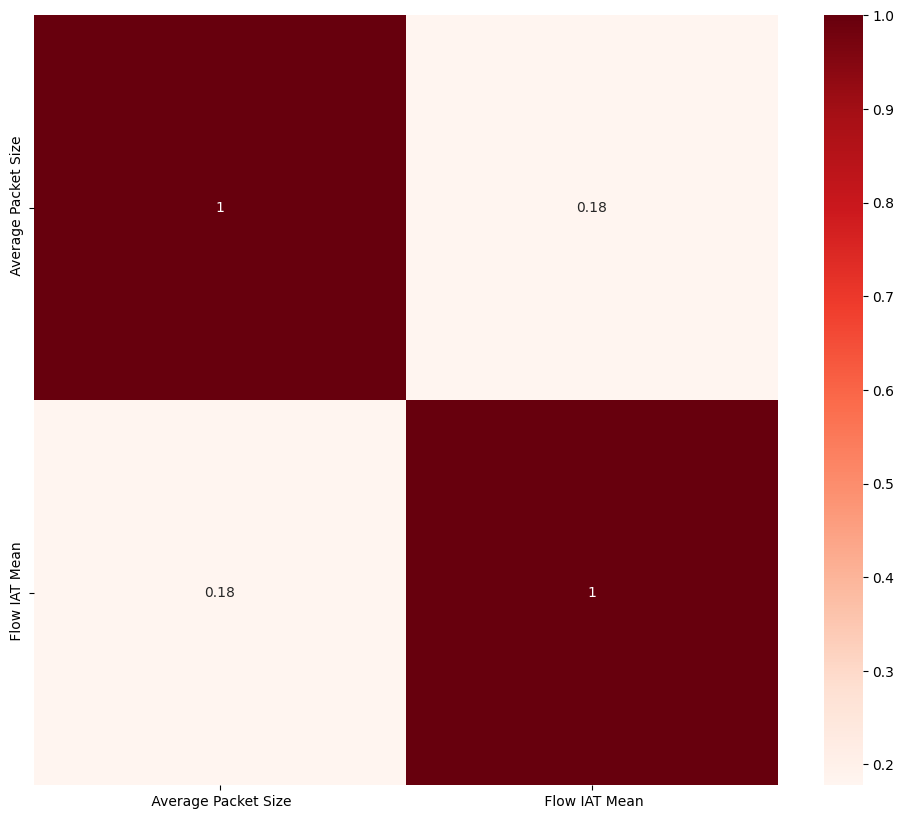

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [308]:
# X= X.select_dtypes(include='number')
# correlation_matrix = X.corr()

# threshold = 0.86

# high_corr_features = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname = correlation_matrix.columns[i]
#             high_corr_features.add(colname)

# X= X.drop(columns=high_corr_features)
# X

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std
0,2.559312,-0.439347,-0.009819,-0.053765,-0.281099,-0.210703,-0.447423,-0.596109,0.096135,2.334574,...,1.471773,-0.323661,-1.004421,-0.485178,-0.235363,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
1,2.569649,-0.439344,-0.011153,-0.054365,-0.281099,-0.210703,-0.444340,-0.508979,-0.053201,-0.206951,...,1.471773,3.089652,0.465104,-0.485457,-0.204973,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
2,2.569704,-0.439345,-0.011153,-0.054365,-0.281099,-0.210703,-0.444340,-0.508979,-0.048568,-0.128105,...,1.471773,3.089652,0.465104,-0.485457,-0.204973,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
3,2.087360,-0.439346,-0.011153,-0.054365,-0.281099,-0.210703,-0.444340,-0.508979,-0.043878,-0.048282,...,1.471773,3.089652,0.465104,-0.485318,-0.196341,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
4,2.559203,-0.439347,-0.009819,-0.053765,-0.281099,-0.210703,-0.447423,-0.596109,0.096135,2.334574,...,1.471773,-0.323661,-1.004421,-0.485248,-0.235363,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,-0.438561,-0.438390,-0.007151,-0.043758,-0.250424,0.153902,-0.408376,0.507539,-0.057113,-0.278151,...,-0.679452,-0.323661,-1.004421,-0.487550,-0.235363,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
2830739,-0.438561,-0.439337,-0.009819,-0.046560,-0.230903,0.385923,-0.354429,2.032314,-0.004581,-0.230484,...,-0.679452,-0.323661,0.465104,-0.487550,-0.235363,0.002545,-0.125734,-0.104565,-0.149326,-0.10946
2830740,2.732418,-0.439344,-0.009819,-0.051863,-0.246241,-0.310140,-0.444340,-0.508979,-0.040105,-0.135460,...,1.471773,-0.323661,-1.004421,-0.417320,-0.235244,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
2830741,-0.438561,-0.408187,-0.004484,-0.035753,-0.244846,0.220194,-0.381659,1.262666,-0.057411,-0.278852,...,-0.679452,-0.323661,-1.004421,-0.487550,-0.235363,0.002545,-0.125734,-0.104565,-0.149326,-0.10946


### SPLITING DATA IN TRAING AND TESTING

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RNN

In [55]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Dropout

In [56]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1)))

model.add(Dense(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [57]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
'''from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming X_train and X_test are your input features

# Iterate through each column in X_train and X_test and encode categorical variables
for i in range(X_train.shape[1]):
    # Check if the dtype of the column is object (indicating categorical data)
    if X_train[:, i].dtype == 'object':
        X_train[:, i] = label_encoder.fit_transform(X_train[:, i])
        X_test[:, i] = label_encoder.transform(X_test[:, i])'''

# Train the model with the preprocessed data
%time history_RNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=1)

Epoch 1/50
17693/17693 [==============================] - 104s 6ms/step - loss: 0.2748 - accuracy: 0.8746 - val_loss: 0.2672 - val_accuracy: 0.8776
Epoch 2/50
17693/17693 [==============================] - 101s 6ms/step - loss: 0.2595 - accuracy: 0.8777 - val_loss: 0.2383 - val_accuracy: 0.9064
Epoch 3/50
17693/17693 [==============================] - 101s 6ms/step - loss: 0.2324 - accuracy: 0.9029 - val_loss: 0.2247 - val_accuracy: 0.9088
Epoch 4/50
17693/17693 [==============================] - 97s 5ms/step - loss: 0.2217 - accuracy: 0.9109 - val_loss: 0.2205 - val_accuracy: 0.9156
Epoch 5/50
17693/17693 [==============================] - 87s 5ms/step - loss: 0.2167 - accuracy: 0.9133 - val_loss: 0.2164 - val_accuracy: 0.9137
Epoch 6/50
17693/17693 [==============================] - 82s 5ms/step - loss: 0.2148 - accuracy: 0.9133 - val_loss: 0.2110 - val_accuracy: 0.9123
Epoch 7/50
17693/17693 [==============================] - 75s 4ms/step - loss: 0.2133 - accuracy: 0.9130 - val_loss

In [59]:
# print("Training Loss: ", history_RNN.history['loss'])
# print("Validation Loss: ", history_RNN.history['val_loss'])

In [60]:
predictions = model.predict(X_test)

17693/17693 [==============================] - 48s 3ms/step


In [61]:
predictions = (predictions > 0.5).astype(int)

In [62]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print("f1score"+" "+str(f1*100))

accuracy 91.6981218725106
f1score 79.20153285866635


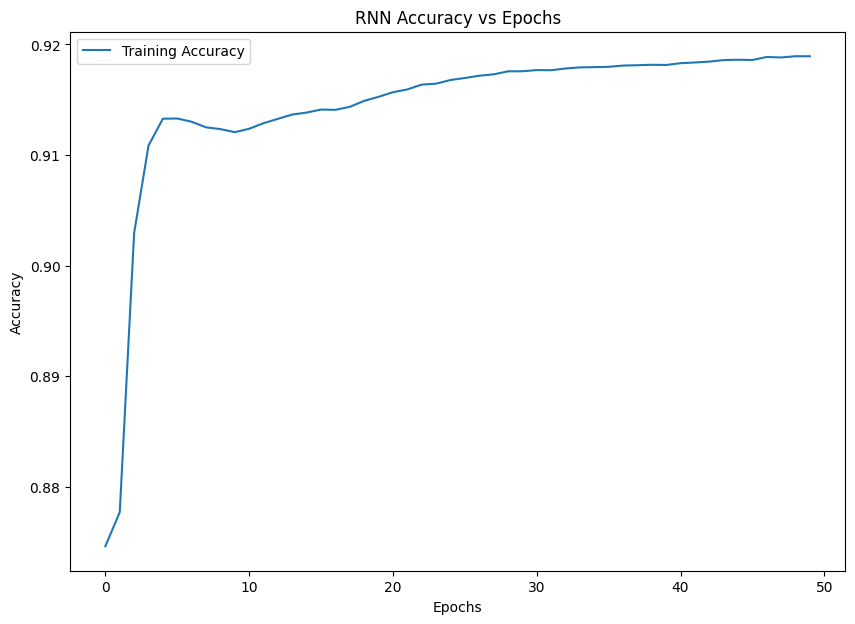

In [63]:
# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history_RNN.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Accuracy vs Epochs')
plt.legend()
plt.show()


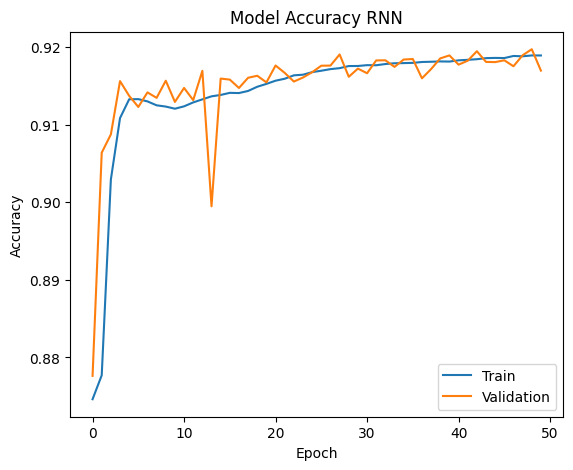

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('Model Accuracy RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')



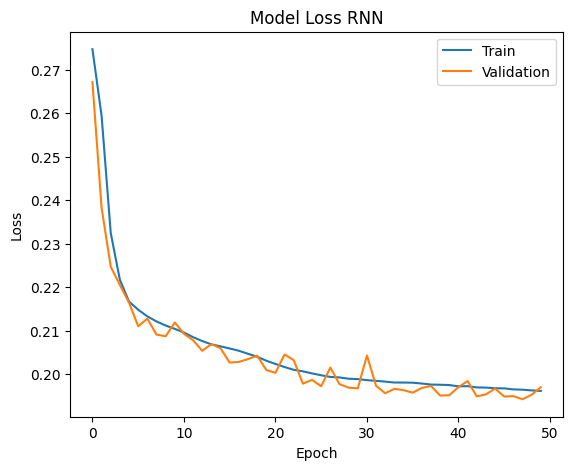

In [65]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('Model Loss RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


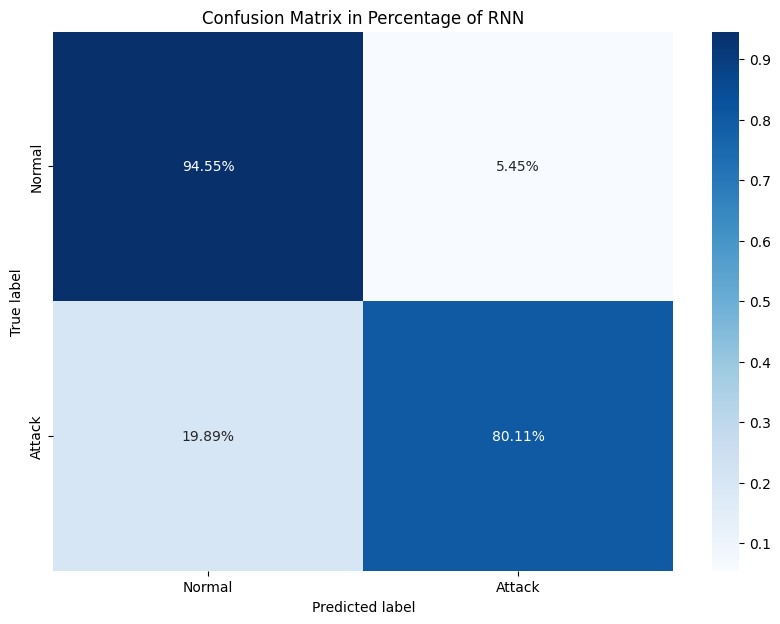

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage of RNN')
plt.show()



accuracy 98.43168494512928
f1score 96.07577090174622

# LSTM

In [67]:
print("numpy_array1 shape:", X_train.shape)

numpy_array1 shape: (2264594, 2)


In [68]:
numpy_array = np.array(X_train)
numpy_array1 = np.array(X_test)
print(type(numpy_array), numpy_array.shape)
print(type(numpy_array1), numpy_array.shape)


<class 'numpy.ndarray'> (2264594, 2)
<class 'numpy.ndarray'> (2264594, 2)


In [69]:
X_train = numpy_array.reshape((numpy_array.shape[0], numpy_array.shape[1],1))
X_test = numpy_array1.reshape((numpy_array1.shape[0], numpy_array1.shape[1],1))

In [70]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [71]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(units=32, input_shape=(None, 1)))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
%time history_LSTM = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, verbose=1)


Epoch 1/50
8847/8847 [==============================] - 65s 7ms/step - loss: 0.2814 - accuracy: 0.8752 - val_loss: 0.2674 - val_accuracy: 0.8753
Epoch 2/50
8847/8847 [==============================] - 59s 7ms/step - loss: 0.2656 - accuracy: 0.8767 - val_loss: 0.2626 - val_accuracy: 0.8772
Epoch 3/50
8847/8847 [==============================] - 53s 6ms/step - loss: 0.2551 - accuracy: 0.8777 - val_loss: 0.2387 - val_accuracy: 0.8700
Epoch 4/50
8847/8847 [==============================] - 57s 6ms/step - loss: 0.2205 - accuracy: 0.9063 - val_loss: 0.2134 - val_accuracy: 0.9125
Epoch 5/50
8847/8847 [==============================] - 54s 6ms/step - loss: 0.2101 - accuracy: 0.9144 - val_loss: 0.2068 - val_accuracy: 0.9146
Epoch 6/50
8847/8847 [==============================] - 55s 6ms/step - loss: 0.2058 - accuracy: 0.9153 - val_loss: 0.2032 - val_accuracy: 0.9152
Epoch 7/50
8847/8847 [==============================] - 57s 6ms/step - loss: 0.2026 - accuracy: 0.9157 - val_loss: 0.2006 - val_ac

In [73]:
# model.save('my_model_lstm.h5')

In [74]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

17693/17693 [==============================] - 62s 3ms/step


In [75]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 93.8334254763322
f1score 83.81755817187356


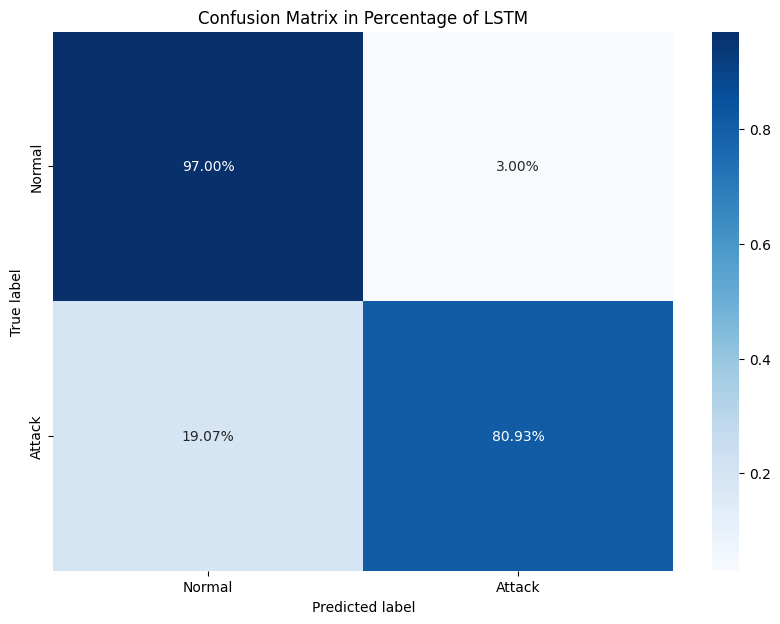

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage of LSTM')
plt.show()


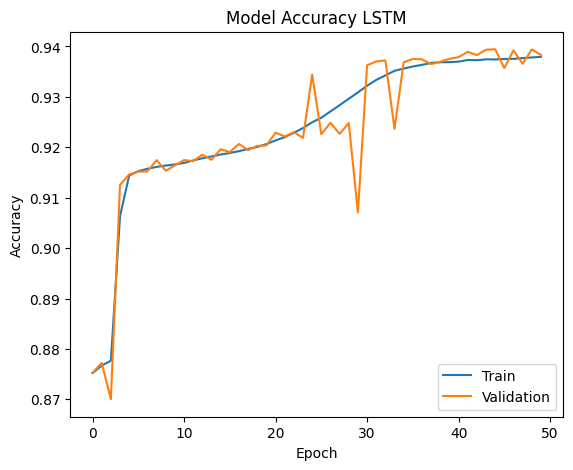

In [77]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('Model Accuracy LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


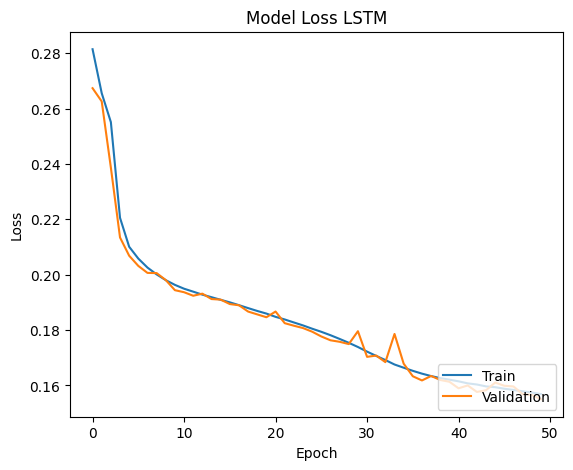

In [78]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('Model Loss LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

accuracy 98.43398116043657
f1score 96.07876091321614

# GRU

In [79]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [80]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(None, 1)))
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [82]:
# history=model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])
%time history_GRU = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/50
8847/8847 [==============================] - 73s 8ms/step - loss: 0.2806 - accuracy: 0.8752 - val_loss: 0.2664 - val_accuracy: 0.8769
Epoch 2/50
8847/8847 [==============================] - 69s 8ms/step - loss: 0.2640 - accuracy: 0.8768 - val_loss: 0.2610 - val_accuracy: 0.8778
Epoch 3/50
8847/8847 [==============================] - 67s 8ms/step - loss: 0.2540 - accuracy: 0.8777 - val_loss: 0.2375 - val_accuracy: 0.8744
Epoch 4/50
8847/8847 [==============================] - 69s 8ms/step - loss: 0.2193 - accuracy: 0.9044 - val_loss: 0.2104 - val_accuracy: 0.9149
Epoch 5/50
8847/8847 [==============================] - 62s 7ms/step - loss: 0.2072 - accuracy: 0.9149 - val_loss: 0.2092 - val_accuracy: 0.9156
Epoch 6/50
8847/8847 [==============================] - 50s 6ms/step - loss: 0.2034 - accuracy: 0.9158 - val_loss: 0.2027 - val_accuracy: 0.9152
Epoch 7/50
8847/8847 [==============================] - 60s 7ms/step - loss: 0.2010 - accuracy: 0.9163 - val_loss: 0.1993 - val_ac

In [83]:
loss, accuracy = model.evaluate(X_test, y_test)
# Make predictions using the model
predictions = model.predict(X_test)

17693/17693 [==============================] - 60s 3ms/step


In [84]:

predictions = (predictions > 0.5).astype(int)

In [85]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 92.62967875947851
f1score 81.44683310731197


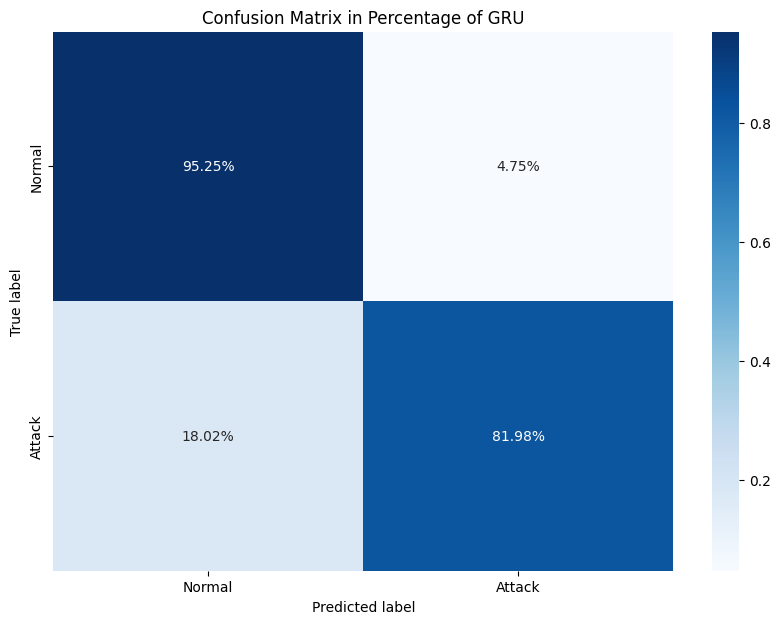

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage of GRU')
plt.show()

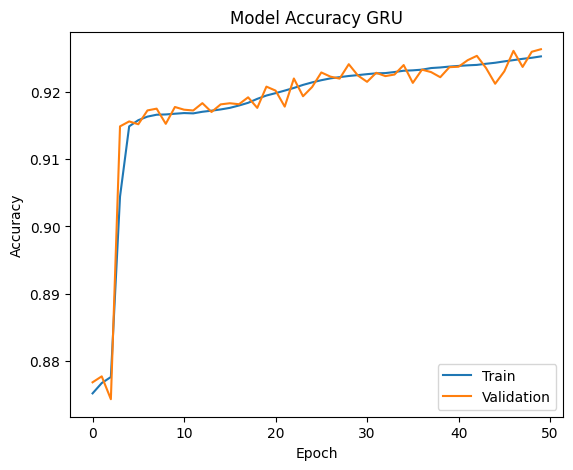

In [87]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('Model Accuracy GRU')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


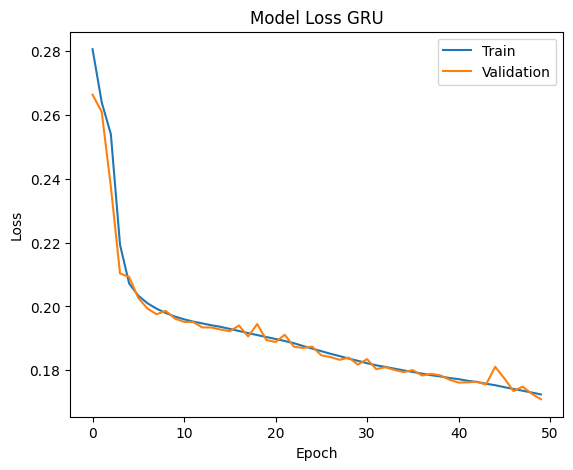

In [88]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Model Loss GRU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

accuracy 98.44828834812037
f1score 96.10985400328569

# GRU-ATTENTION MODEL

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, Dot, Activation
import numpy as np

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionGRU(Model):
    def __init__(self, units):
        super(AttentionGRU, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # GRU output and hidden state calculation
        outputs, state = self.gru(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector






In [12]:
# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)

In [13]:

gru_layer = AttentionGRU(units)

In [14]:

outputs = gru_layer(inputs)

In [15]:

# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model


In [25]:
%time history_GRU_att = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/50
4424/4424 [==============================] - 67s 15ms/step - loss: 0.1932 - accuracy: 0.9075 - val_loss: 0.1931 - val_accuracy: 0.9028
Epoch 2/50
4424/4424 [==============================] - 63s 14ms/step - loss: 0.1930 - accuracy: 0.9078 - val_loss: 0.1932 - val_accuracy: 0.9052
Epoch 3/50
4424/4424 [==============================] - 65s 15ms/step - loss: 0.1928 - accuracy: 0.9079 - val_loss: 0.1922 - val_accuracy: 0.9143
Epoch 4/50
4424/4424 [==============================] - 68s 15ms/step - loss: 0.1927 - accuracy: 0.9081 - val_loss: 0.1961 - val_accuracy: 0.9056
Epoch 5/50
4424/4424 [==============================] - 65s 15ms/step - loss: 0.1926 - accuracy: 0.9082 - val_loss: 0.1916 - val_accuracy: 0.9140
Epoch 6/50
4424/4424 [==============================] - 65s 15ms/step - loss: 0.1924 - accuracy: 0.9085 - val_loss: 0.1941 - val_accuracy: 0.9140
Epoch 7/50
4424/4424 [==============================] - 67s 15ms/step - loss: 0.1923 - accuracy: 0.9083 - val_loss: 0.1950 -

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

17693/17693 [==============================] - 72s 4ms/step - loss: 0.1908 - accuracy: 0.9202


In [27]:
predictions = model.predict(X_test)

17693/17693 [==============================] - 68s 4ms/step


In [28]:

predictions = (predictions > 0.5).astype(int)

In [29]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 92.02012191136963
f1score 79.87025138793588


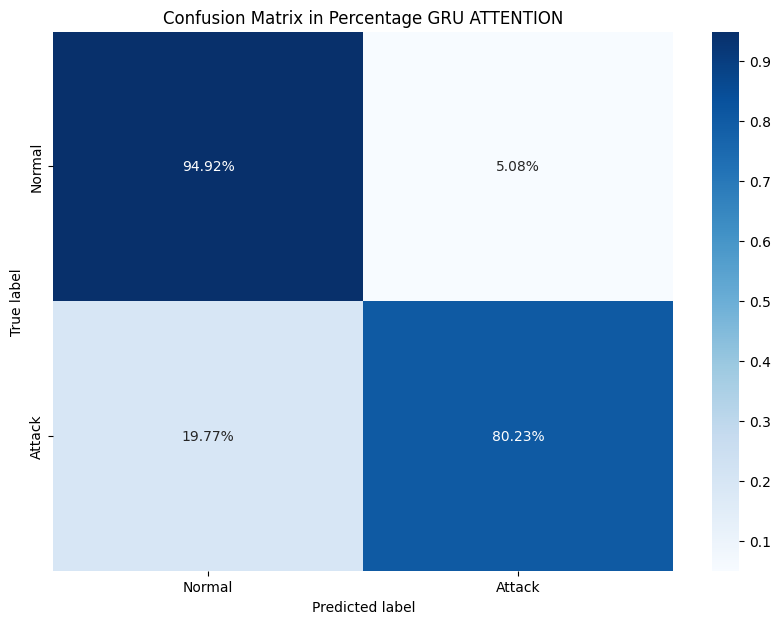

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage GRU ATTENTION')
plt.show()

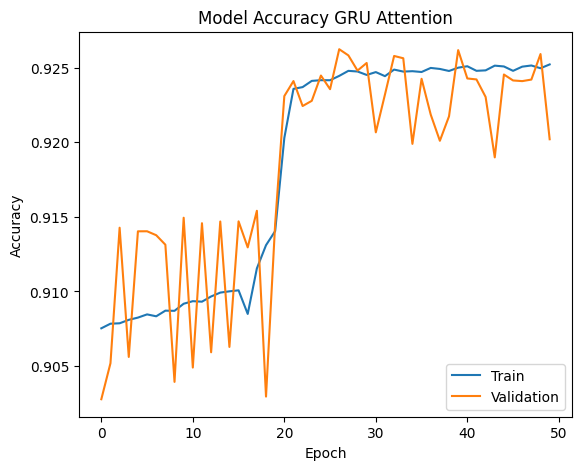

In [31]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_GRU_att.history['accuracy'])
plt.plot(history_GRU_att.history['val_accuracy'])
plt.title('Model Accuracy GRU Attention')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

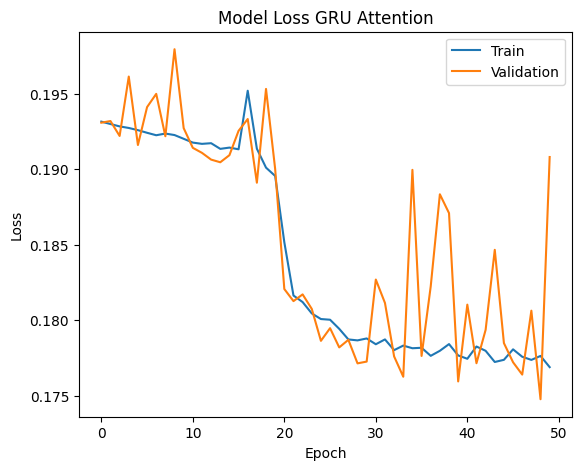

In [32]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_GRU_att.history['loss'])
plt.plot(history_GRU_att.history['val_loss'])
plt.title('Model Loss GRU Attention')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

accuracy 98.49015011949152
f1score 96.1858696913178

# LSTM-ATTENTION

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dense, Concatenate, Dot, Activation
import numpy as np


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

class AttentionLSTM(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLSTM, self).__init__()
        self.units = units
        self.rnn = LSTM(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs, training=None):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state_h, state_c = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state_h, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
attention_lstm_layer = AttentionLSTM(units)
context_vector = attention_lstm_layer(inputs)

# Define output layer
outputs = Dense(1, activation='sigmoid')(context_vector)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and y_train are predefined
# X_train shape should be (num_samples, sequence_length, input_dim)
# y_train shape should be (num_samples,)


In [35]:
%time history_LSTM_att = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/50
4424/4424 [==============================] - 63s 13ms/step - loss: 0.2714 - accuracy: 0.8751 - val_loss: 0.2470 - val_accuracy: 0.8764
Epoch 2/50
4424/4424 [==============================] - 59s 13ms/step - loss: 0.2447 - accuracy: 0.8766 - val_loss: 0.2449 - val_accuracy: 0.8766
Epoch 3/50
4424/4424 [==============================] - 62s 14ms/step - loss: 0.2433 - accuracy: 0.8769 - val_loss: 0.2418 - val_accuracy: 0.8772
Epoch 4/50
4424/4424 [==============================] - 61s 14ms/step - loss: 0.2424 - accuracy: 0.8771 - val_loss: 0.2420 - val_accuracy: 0.8771
Epoch 5/50
4424/4424 [==============================] - 60s 14ms/step - loss: 0.2420 - accuracy: 0.8771 - val_loss: 0.2405 - val_accuracy: 0.8771
Epoch 6/50
4424/4424 [==============================] - 59s 13ms/step - loss: 0.2416 - accuracy: 0.8771 - val_loss: 0.2408 - val_accuracy: 0.8771
Epoch 7/50
4424/4424 [==============================] - 65s 15ms/step - loss: 0.2410 - accuracy: 0.8772 - val_loss: 0.2491 -

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

17693/17693 [==============================] - 83s 5ms/step - loss: 0.1961 - accuracy: 0.9038


In [37]:
predictions = model.predict(X_test)

17693/17693 [==============================] - 83s 5ms/step


In [38]:

predictions = (predictions > 0.5).astype(int)

In [39]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 90.38433345285428
f1score 73.21930174097415


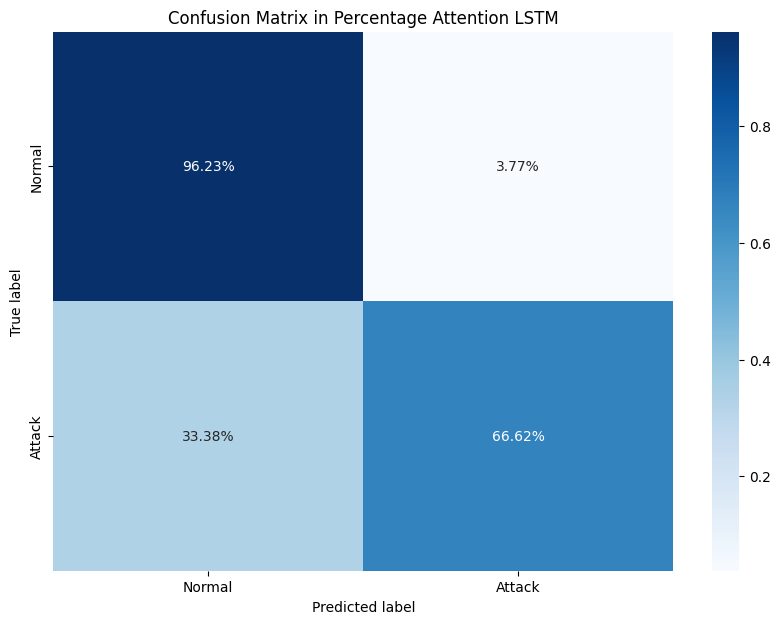

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage Attention LSTM')
plt.show()


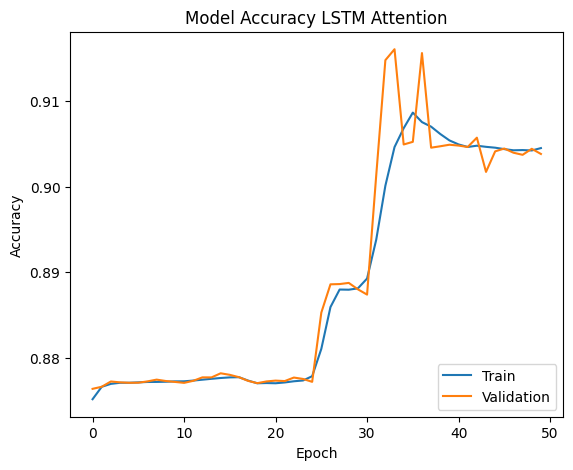

In [41]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_LSTM_att.history['accuracy'])
plt.plot(history_LSTM_att.history['val_accuracy'])
plt.title('Model Accuracy LSTM Attention')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

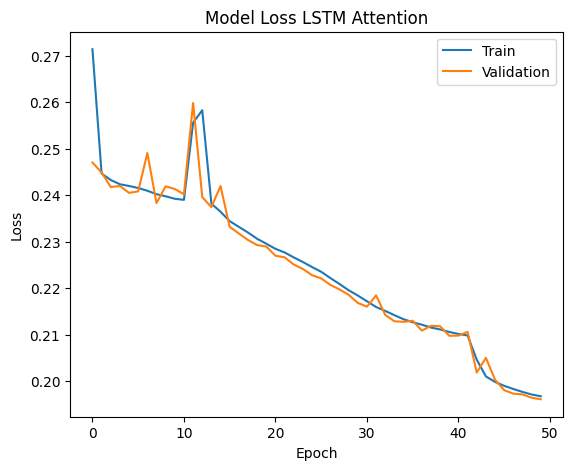

In [42]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_LSTM_att.history['loss'])
plt.plot(history_LSTM_att.history['val_loss'])
plt.title('Model Loss LSTM Attention')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

accuracy 98.21248469925762
f1score 95.49437241772331

# RNN-Attention

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dense, Concatenate, Dot, Activation
import numpy as np

In [44]:

class AttentionRNN(Model):
    def __init__(self, units):
        super(AttentionRNN, self).__init__()
        self.units = units
        self.rnn = SimpleRNN(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

In [45]:

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
rnn_layer = AttentionRNN(units)
outputs = rnn_layer(inputs)

In [46]:
# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:

# Train the model
%time history_RNN_att = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/50
4424/4424 [==============================] - 46s 10ms/step - loss: 0.2652 - accuracy: 0.8748 - val_loss: 0.2449 - val_accuracy: 0.8760
Epoch 2/50
4424/4424 [==============================] - 43s 10ms/step - loss: 0.2436 - accuracy: 0.8764 - val_loss: 0.2419 - val_accuracy: 0.8758
Epoch 3/50
4424/4424 [==============================] - 41s 9ms/step - loss: 0.2415 - accuracy: 0.8763 - val_loss: 0.2404 - val_accuracy: 0.8757
Epoch 4/50
4424/4424 [==============================] - 43s 10ms/step - loss: 0.2408 - accuracy: 0.8764 - val_loss: 0.2661 - val_accuracy: 0.8767
Epoch 5/50
4424/4424 [==============================] - 41s 9ms/step - loss: 0.2630 - accuracy: 0.8765 - val_loss: 0.2411 - val_accuracy: 0.8767
Epoch 6/50
4424/4424 [==============================] - 43s 10ms/step - loss: 0.2385 - accuracy: 0.8767 - val_loss: 0.2381 - val_accuracy: 0.8766
Epoch 7/50
4424/4424 [==============================] - 43s 10ms/step - loss: 0.2374 - accuracy: 0.8770 - val_loss: 0.2369 - v

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)

17693/17693 [==============================] - 75s 4ms/step - loss: 0.2036 - accuracy: 0.9015


In [49]:
predictions = model.predict(X_test)

17693/17693 [==============================] - 70s 4ms/step


In [50]:

predictions = (predictions > 0.5).astype(int)

In [51]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions )
print("f1score"+" "+str(f1*100))

accuracy 90.14588032479082
f1score 72.67990499742906


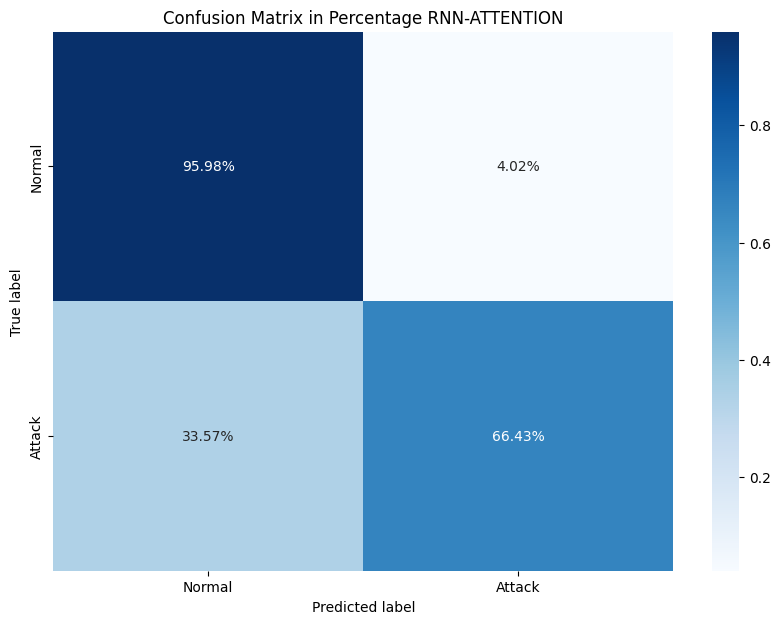

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage RNN-ATTENTION')
plt.show()

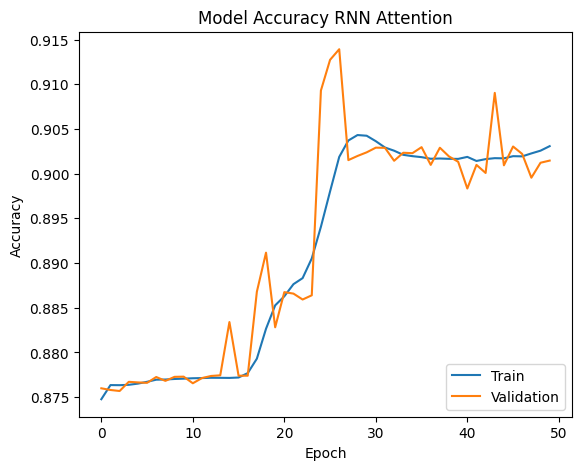

In [53]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_RNN_att.history['accuracy'])
plt.plot(history_RNN_att.history['val_accuracy'])
plt.title('Model Accuracy RNN Attention')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

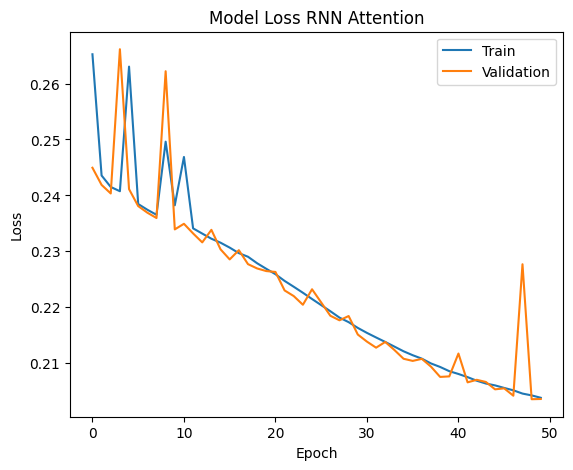

In [54]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_RNN_att.history['loss'])
plt.plot(history_RNN_att.history['val_loss'])
plt.title('Model Loss RNN Attention')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

accuracy 98.3348906383302
f1score 95.82108739499525

RNN-
accuracy 98.43168494512928
f1score 96.07577090174622

LSTM-
accuracy 98.43398116043657
f1score 96.07876091321614

GRU-
accuracy 98.44828834812037
f1score 96.10985400328569



ATTENTION RNN-
accuracy 98.3348906383302
f1score 95.82108739499525

ATTENTION LSTM-
accuracy 98.21248469925762
f1score 95.49437241772331

ATTENTION GRU-
accuracy 98.49015011949152
f1score 96.1858696913178